## Homework 7
### Math 472
### Meghan Edgerton

## Question 1:
Implementing Example 6.1 on page 157 of Computational Statistics for $r=2$, produce a plot similar to Figure 6.2, and report the acceptance rate of your algorithm. Show the generated random samples by superimporting the following three items in another plot, using different line type for different curves, and display of legend:

(a) A relative frequency histogram with appropriate number of bars for your generated random numbers with a sample size of $n = 5000$.

(b) An estimated probability density curve based on the generated random numbers

(c) The true Gamma(2,1) probability density curve.

## (1):

The acceptance rate:
0.9792401096748923
The acceptance rate of this PDF was pretty close to 100, which makes it difficult to distinguish between the standard normal curve and the density curve from the algorithm.


<Figure size 432x288 with 0 Axes>

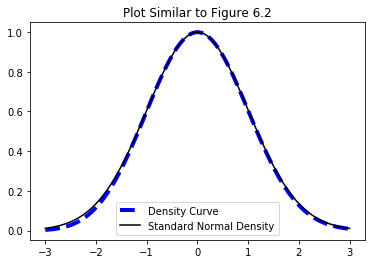

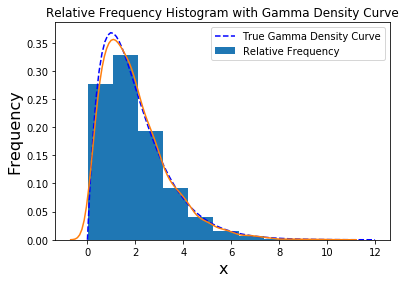

<Figure size 432x288 with 0 Axes>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.linalg import norm


# Defining parameters r, a, and b for the Gamma(2,1) distribution
r = 2
a = r - (1/3)
b = 1/np.sqrt(9*a)

# Defining the functions from the book
def t(y):
    return a*(1+b*y)**3

def QE(Z):
    return np.exp((Z**2/2)+a*np.log((t(Z))/a) - t(Z) + a)

def Q(y):
    return np.exp(a * np.log(t(y)/a) - t(y) + a)

def e(y):
    return np.exp((-y**2)/2)

acc = []
iters = 0

# Acceptance-Rejection Sampling Method
while len(acc) < 5000:
    Z = np.random.randn()
    U = np.random.rand()
    
    if(U <= QE(Z) and t(Z) > 0):
        acc.append(t(Z))
    iters+=1
 

print("The acceptance rate:")
print(5000/iters)
print("The acceptance rate of this PDF was pretty close to 100, which makes it difficult to distinguish between the standard normal curve and the density curve from the algorithm.")

# Generating the plots
xs = np.linspace(-3,3,100)
plt.plot(xs,Q(xs),'b--',linewidth=4)
plt.plot(xs,e(xs),color = 'black')
plt.title('Plot Similar to Figure 6.2')
plt.legend(('Density Curve','Standard Normal Density'))

plt.figure()

plt.hist(acc, density = True)
xs = np.linspace(0,12,100)
plt.plot(xs,st.gamma.pdf(xs,r),'b--')
sns.distplot(acc,kde=True,hist=False)
plt.title('Relative Frequency Histogram with Gamma Density Curve')
plt.xlabel('x',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.legend(('True Gamma Density Curve','Relative Frequency'))
plt.figure()


## Question 2:

Generate a random sample with sample size $n = 5000$ according to the following probability density function (PDF):

$f(x) \approx \frac{1}{12} (1+x)exp\{-\frac{(x-1)^{2}}{2x}\}, x > 0$.

Produce a plot similar to Figure 6.2. Report the acceptance rate of your algorithm. Your algorithm's acceptance rate must be higher than 50%. Show the generated random samples by superimposing the following three items in another plot, using different line type for different curces, and display of legend:

(a) A relative frequency histogram with appropriate number of bars for your generated random numbers with sample size $n = 5000$

(b) An estimated probability density curve based on the generated random numbers

(c) The true PDF

## (2a):

C:\Users\megha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Acceptance Rate:
0.6756756756756757
The acceptance rate on this question is a lot lower than the previous question, but still appropriately above 50 percent.


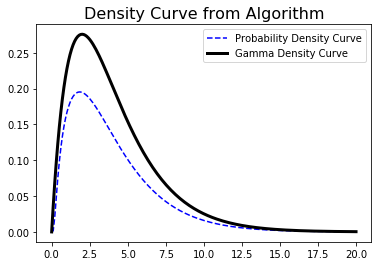

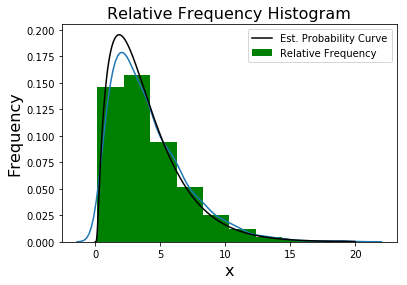

In [30]:
# Defining the given PDF
def f(x):
    return (1/12)*(1+x)*np.exp(-((x-1)**2)/(2*x))

iters = 0

def f2(x):
    return (3/2)*st.gamma.pdf(x,2,scale=2)

# Generating Plot Similar to Figure 6.2
xs = np.linspace(0,20,200)
plt.figure()
plt.plot(xs,f(xs), 'b--')
plt.plot(xs,f2(xs),color = 'black', linewidth=3)
plt.title('Density Curve from Algorithm', fontsize=16)
plt.legend(('Probability Density Curve','Gamma Density Curve'))
plt.figure()
ac = []

# Acceptance-Rejection Sampling Method
while len(ac) < 5000:
    Y = np.random.gamma(2,scale=2.1)
    U = np.random.rand()
    
    if(U <= f(Y)/f2(Y)):
        ac.append(Y)
    iters+=1
    
print("Acceptance Rate:")
print(5000/iters)
print("The acceptance rate on this question is a lot lower than the previous question, but still appropriately above 50 percent.")

# Generating Relative Frequency Histogram with Curves
xs2 = np.linspace(0,20,500)
plt.hist(ac,density=True, color='green')
sns.distplot(ac,kde=True,hist=False)
plt.plot(xs2,f(xs2),color='black')
plt.title('Relative Frequency Histogram',fontsize=16)
plt.xlabel('x',fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(('Est. Probability Curve','Relative Frequency'))

## Question 3 (Non-coding):

Let $U_{1},U_{2},...,U_{n}$ be a random sample from $UNIF[0,1]$ distribution. Let

$U_{(n)} = max\{U_{1},U_{2},...,U_{n}\}$

Prove that $U_{(n)}$ converges to 1 in probability.

The definition of Convergence in Probability is:

$lim_{n \to \infty} P(|X_{n} - x| < \epsilon) = 1$ for $\epsilon > 0$, then $X_{n} \overset{P}{\to} k$.

To prove this with the Uniform(0,1) distribution, prove that:

$lim_{n \to \infty} P(|U_{(n)} - 1| < \epsilon) = 1$ for $\epsilon > 0.$

$\approx P(-\epsilon + 1 < U_{(n)} < \epsilon + 1)$

By the fundamental theorem of calculus and the basic properties of a CDF:

$\approx P(-\epsilon + 1 < U_{(n)} < \epsilon + 1) = F_{U_{(n)}}(1+\epsilon) - F_{U_{(n)}}(1-\epsilon)$

The CDF of the Uniform Distribution is:

$F_{x}(X) = \prod_{i=0}^{n} \int_{0}^{x} \frac{1}{b-a} dx$

Applying our distribution to this gives:

$F_{U_{(n)}}(X) = \prod_{i=0}^{n} \int_{0}^{x} \frac{1}{1-0} du$

Which gives the distribution:

$0$ for $x\leq 0$

$x^{n}$ for $0<x<1$

$1$ for $x\geq1$

Substituting $(1+\epsilon)$ and $(1-\epsilon)$:

$P(-\epsilon + 1 < U_{(n)} < \epsilon + 1) = 1 - (1-\epsilon)^{n}$

Taking the limit of that gives:

$lim_{n \to \infty} [1-(1-\epsilon)^{n}]$ for $\epsilon >0 \approx 1 - 0 = 1$

Therefore, $U_{(n)}$ converges in probability to 1.

$U_{(n)} \overset{P}{\to} 1$

Q.E.D.